In [45]:
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import math

In [2]:
df = pd.read_csv('PvP_PvA.Uniq_interaction.txt',sep='\t')

In [3]:
df.head()

Unnamed: 0       IntA       IntB originCol qualityIntact qualityBiogrid  \
0           1  AT1G04250  AT1G04250       PvP            HQ             HQ   
1           2  AT1G73410  AT4G37260       PvP           NaN            NaN   
2           3  AT1G78590  AT1G78590       PvP           NaN            NaN   
3           4  AT4G32010  AT5G51760       PvP           NaN            NaN   
4           5  AT4G24470  AT4G24470       PvP           NaN            NaN   

  confirmed  
0      True  
1     False  
2     False  
3     False  
4     False

In [4]:
df_tajima = pd.read_csv('test.out',sep='\t')

In [5]:
df_tajima.set_index('genename',inplace=True)

In [6]:
df_tajima.head()

Unnamed: 0   TajimaD
genename                              
AT4G19470.TAIR10           0 -0.936811
AT5G43860.TAIR10           1 -0.084270
AT1G68650.TAIR10           2 -2.284643
AT1G28050.TAIR10           3 -0.558072
AT3G59880.TAIR10           4 -0.976995

In [7]:
nodes = list(set(list(df['IntA'].values)+list(df['IntB'].values)))

In [49]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

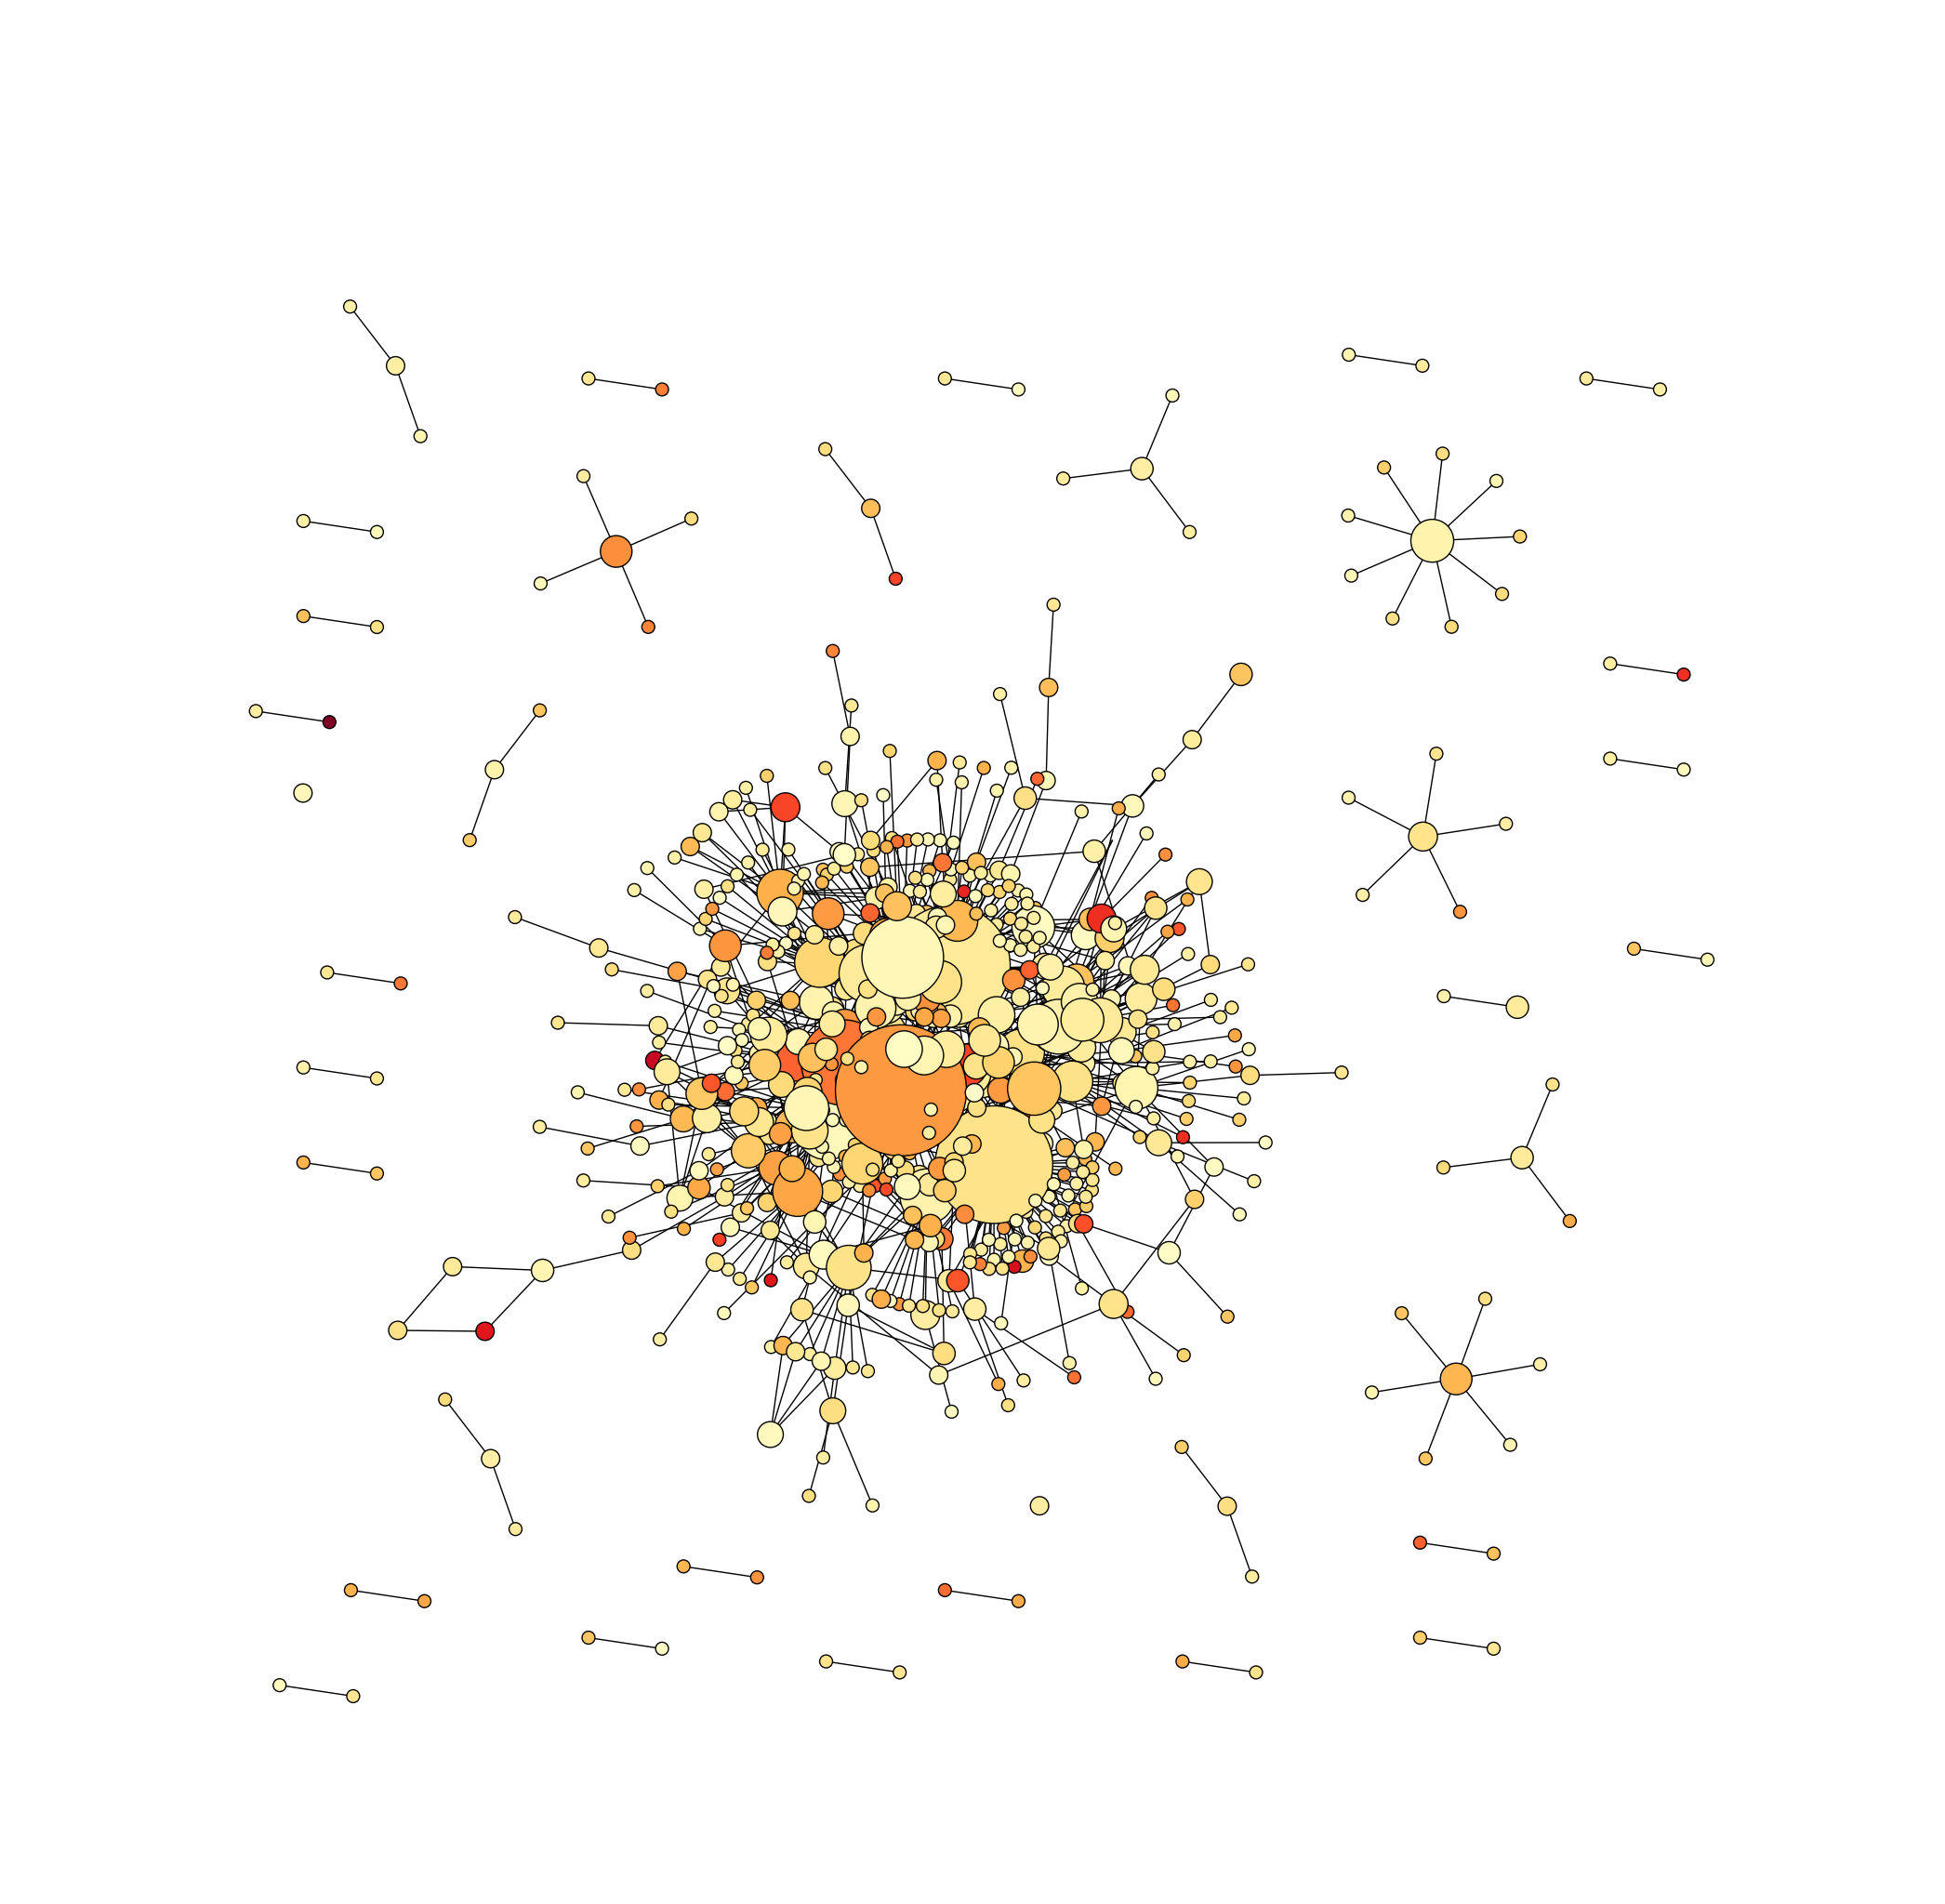

In [50]:
plt.style.use('classic')
def PvPNPvA():
    G=nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(df[['IntA','IntB']].values)
    return G

G = PvPNPvA()
colors = [df_tajima.loc[x+'.TAIR10']['TajimaD'] for x in G]
sizes  = np.array([G.degree()[x] for x in G]) * 100
pos = graphviz_layout(G, prog="neato")
c = [] # size
s = [] # color 
#  prog=[‘neato’|’dot’|’twopi’|’circo’|’fdp’|’nop’]
plt.figure(1, figsize=(20, 20))
nx.draw(G,pos,node_color=colors,node_size=sizes,cmap=plt.cm.YlOrRd)

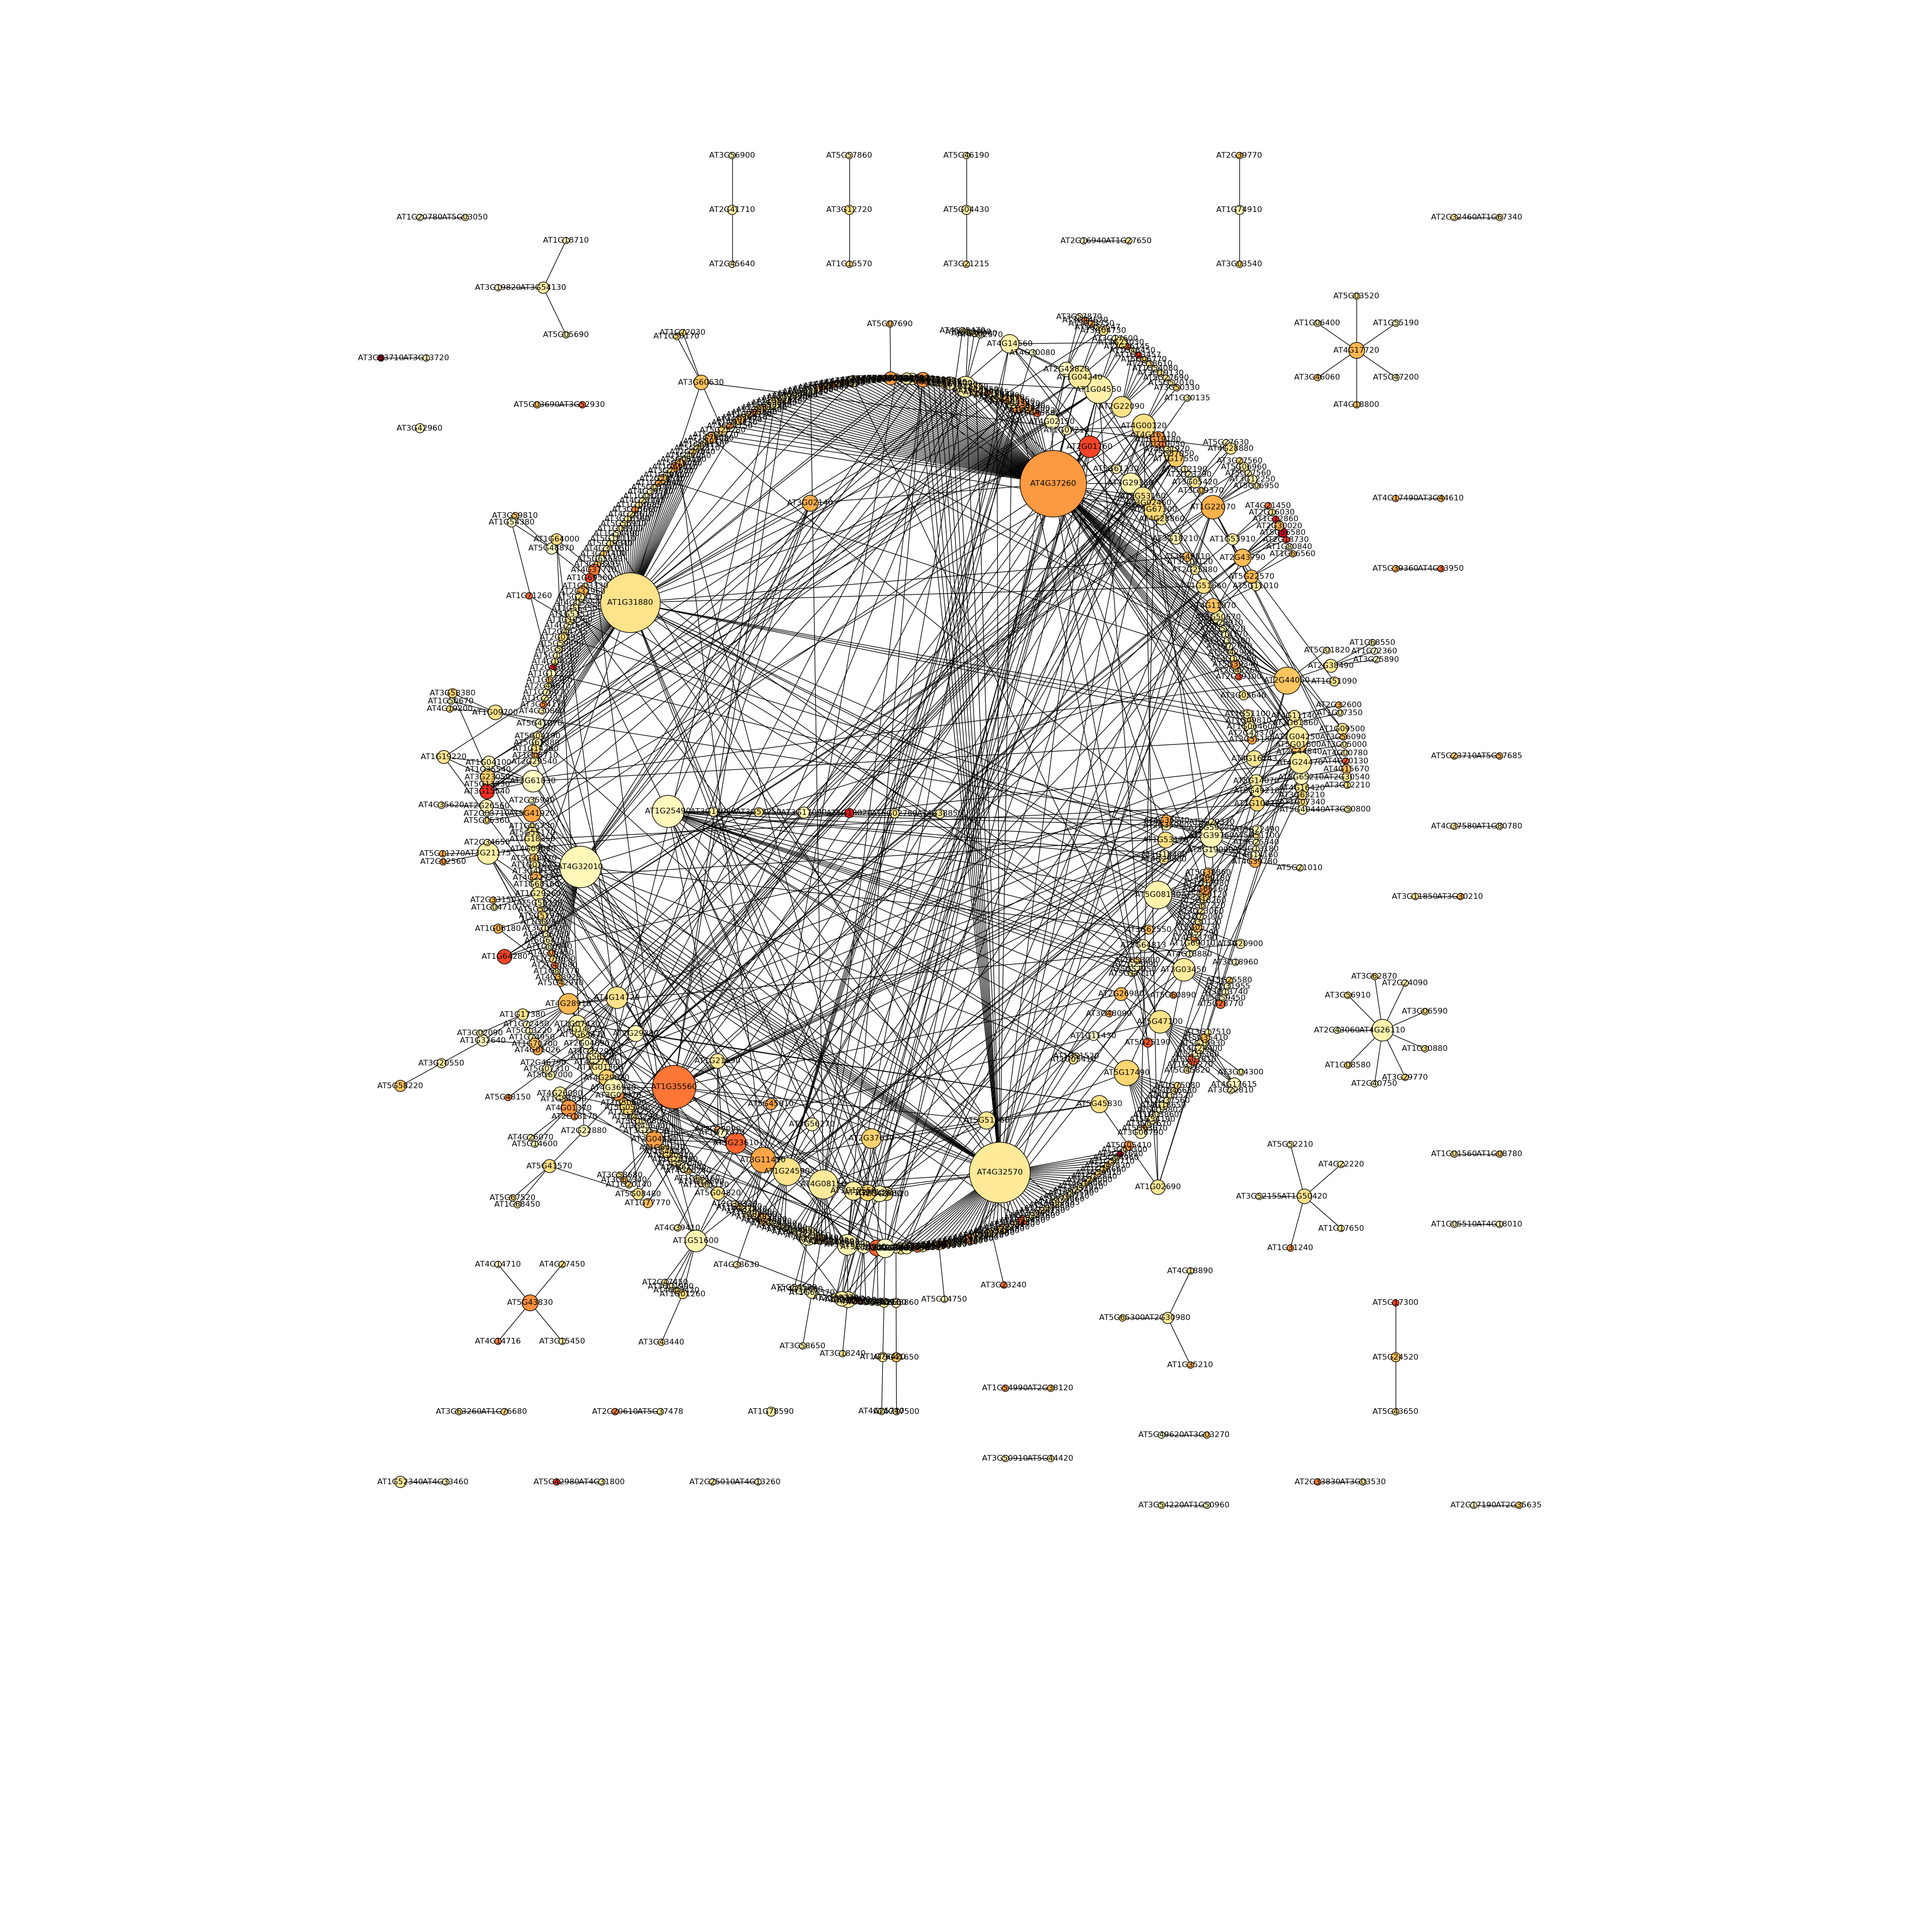

In [54]:
def PvPNPvA():
    G=nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(df[['IntA','IntB']].values)
    return G

G = PvPNPvA()
colors = [df_tajima.loc[x+'.TAIR10']['TajimaD'] for x in G]
sizes  = np.array([G.degree()[x] for x in G]) * 100
pos = graphviz_layout(G, prog="twopi")
c = [] # size
s = [] # color 
#  prog=[‘neato’|’dot’|’twopi’|’circo’|’fdp’|’nop’]
plt.figure(1, figsize=(40, 40))
nx.draw(G,pos,node_color=colors,node_size=sizes,cmap=plt.cm.YlOrRd)
labels=nx.draw_networkx_labels(G,pos)

In [60]:
G.edges('AT5G58220')

[('AT5G58220', 'AT5G58220'), ('AT5G58220', 'AT3G20550')]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 20, 24, 40, 44, 83, 86, 103]


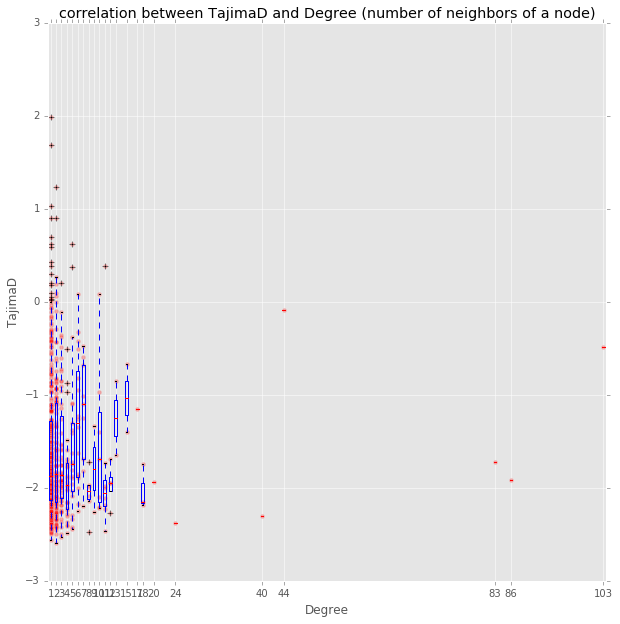

In [40]:
matplotlib.style.use('ggplot')
plt.figure(1, figsize=(10, 10))
plt.scatter([G.degree()[x] for x in G],colors,c='r',alpha=0.3)

plt.xlabel('Degree')
plt.ylabel('TajimaD')

plt.title('correlation between TajimaD and Degree (number of neighbors of a node)')
dic={}
for n,v in enumerate([G.degree()[x] for x in G]):
    if math.isnan(colors[n]) == True:
        continue
    try:
        dic[v].append(colors[n])
    except KeyError:
        dic[v] = [colors[n]]
x_in = dic.keys()
print x_in
data = [dic[x] for x in x_in]

#print data
plt.boxplot(data,positions = x_in )
#plt.xlim(0,50)
plt.show()

In [26]:
G.number_of_edges()


987

In [25]:
G.number_of_nodes()
ddd

672

In [13]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low), 0)



In [14]:
data

array([  5.55454596e+01,   8.02687669e+01,   6.55740336e+00,
         6.39725237e+01,   3.80539382e+00,   5.41640319e+01,
         3.88200623e+01,   9.91663644e+01,   6.75959087e+01,
         3.81267598e+01,   8.94402405e+01,   4.40219156e+01,
         3.97868492e+01,   6.44660535e+01,   9.71499652e+01,
         8.69471456e+01,   7.56820309e+01,   8.29156676e+00,
         5.68128834e+01,   8.22519619e+01,   6.36865385e+01,
         4.05094227e+01,   6.32767483e+01,   9.07872575e+01,
         4.78651762e+01,   4.54434318e+01,   4.31617879e+01,
         3.67429971e+01,   6.59662196e+01,   8.01252815e+01,
         3.68790817e+01,   9.40893833e+01,   9.86373059e+01,
         2.88745567e+01,   7.36986054e+01,   9.15851293e+00,
         3.16990520e+01,   6.11876743e+01,   3.07568293e+01,
         1.44138586e-01,   5.84432381e+01,   5.95931721e+01,
         4.10515991e+01,   7.88664535e+01,   5.09172470e+01,
         4.84217931e+01,   6.67722129e+01,   3.50000377e+01,
         6.67931469e+01,